In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as mp
import random
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv('DatasetCorrect.csv', header=0)
X = data.drop ('Label', axis =1)
y = data['Label']
data.head()

,MQ-2,MQ-5,MQ-6,MQ-8,MQ-9,MQ-135,Label
0,192,554,706,662,508,613,1
1,191,554,707,662,508,613,1
2,192,554,707,662,510,613,1
3,192,554,707,663,511,613,1
4,193,555,707,662,511,614,1


In [3]:
data.describe(include='all')

,MQ-2,MQ-5,MQ-6,MQ-8,MQ-9,MQ-135,Label
count,40706.000000,40706.000000,40706.000000,40706.000000,40706.000000,40706.00000,40706.000000
mean,122.829337,449.058001,501.059524,462.739031,437.997519,465.25780,3.651894
std,60.390694,173.370339,174.943470,193.916107,224.444475,98.77446,1.572311
min,87.000000,223.000000,265.000000,286.000000,224.000000,372.00000,1.000000
25%,95.000000,312.000000,324.000000,328.000000,304.000000,401.00000,2.000000
50%,99.000000,377.000000,516.000000,382.000000,323.000000,416.00000,4.000000
75%,121.000000,586.000000,675.000000,580.000000,704.000000,468.00000,5.000000
max,379.000000,795.000000,802.000000,885.000000,864.000000,728.00000,6.000000


In [12]:
print(data['Label'].value_counts())

2    7993
3    7925
5    7862
4    6979
6    6344
1    3603
Name: Label, dtype: int64


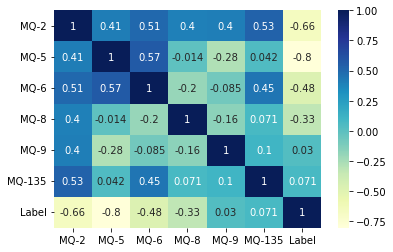

In [13]:
# Check Correlation between MQ varaibles
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
mp.show()

<AxesSubplot:xlabel='Label', ylabel='MQ-135'>

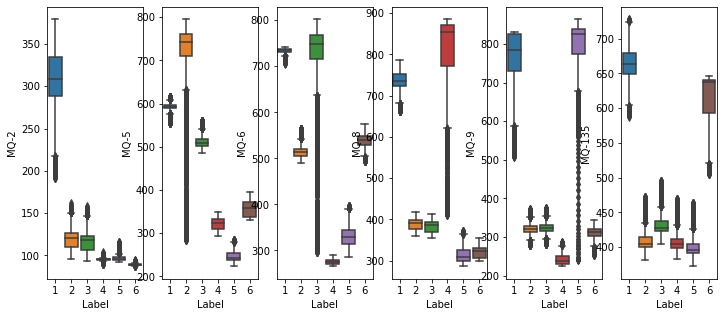

In [14]:
#Check Variation across different labels for MQ variables
fig, axs = plt.subplots(ncols=6,figsize=(12,5))
sns.boxplot(x="Label", y="MQ-2", data=data,ax=axs[0])
sns.boxplot(x="Label", y="MQ-5", data=data,ax=axs[1])
sns.boxplot(x="Label", y="MQ-6", data=data,ax=axs[2])
sns.boxplot(x="Label", y="MQ-8", data=data,ax=axs[3])
sns.boxplot(x="Label", y="MQ-9", data=data,ax=axs[4])
sns.boxplot(x="Label", y="MQ-135", data=data,ax=axs[5])

<AxesSubplot:xlabel='MQ-135', ylabel='Count'>

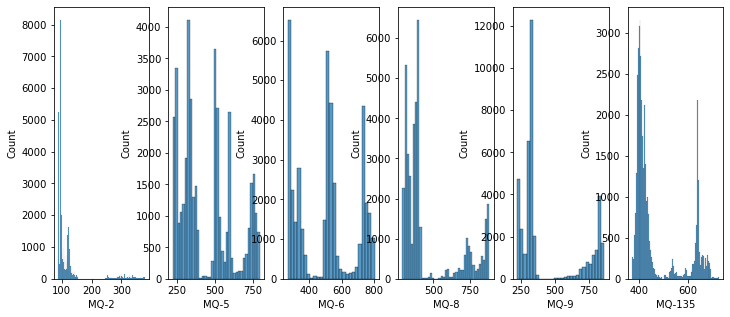

In [7]:
fig, axs = plt.subplots(ncols=6,figsize=(12,5))
sns.histplot(x=data["MQ-2"],ax=axs[0])
sns.histplot(x=data["MQ-5"],ax=axs[1])
sns.histplot(x=data["MQ-6"],ax=axs[2])
sns.histplot(x=data["MQ-8"],ax=axs[3])
sns.histplot(x=data["MQ-9"],ax=axs[4])
sns.histplot(x=data["MQ-135"],ax=axs[5])

In [4]:
cols_to_norm = ['MQ-2', 'MQ-5', 'MQ-6','MQ-8','MQ-9','MQ-135']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data.head()

,MQ-2,MQ-5,MQ-6,MQ-8,MQ-9,MQ-135,Label
0,0.359589,0.578671,0.821229,0.627713,0.443750,0.676966,1
1,0.356164,0.578671,0.823091,0.627713,0.443750,0.676966,1
2,0.359589,0.578671,0.823091,0.627713,0.446875,0.676966,1
3,0.359589,0.578671,0.823091,0.629382,0.448437,0.676966,1
4,0.363014,0.580420,0.823091,0.627713,0.448437,0.679775,1


<AxesSubplot:xlabel='T_MQ-135', ylabel='Count'>

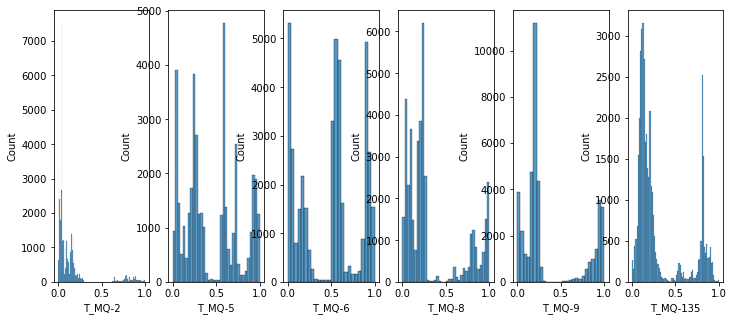

In [5]:
fig, axs = plt.subplots(ncols=6,figsize=(12,5))
data['T_MQ-2'] = np.log2(data['MQ-2']+1)
data['T_MQ-5'] = np.log2(data['MQ-5']+1)
data['T_MQ-6'] = np.log2(data['MQ-6']+1)
data['T_MQ-8'] = np.log2(data['MQ-8']+1)
data['T_MQ-9'] = np.log2(data['MQ-9']+1)
data['T_MQ-135'] = np.log2(data['MQ-135']+1)
sns.histplot(x=data["T_MQ-2"],ax=axs[0])
sns.histplot(x=data["T_MQ-5"],ax=axs[1])
sns.histplot(x=data["T_MQ-6"],ax=axs[2])
sns.histplot(x=data["T_MQ-8"],ax=axs[3])
sns.histplot(x=data["T_MQ-9"],ax=axs[4])
sns.histplot(x=data["T_MQ-135"],ax=axs[5])

In [24]:
random.seed(100)
feature_cols = ['T_MQ-2', 'T_MQ-5','T_MQ-6','T_MQ-8','T_MQ-9','T_MQ-135']

X = data[feature_cols]
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
X_train.head()

AttributeError: 'RandomForestClassifier' object has no attribute 'seed'

In [25]:
clf = KNeighborsClassifier(n_neighbors=1)
neigh=clf.fit(X_train,y_train) 
y_pred =neigh.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(neigh,X_test,y_test).mean())

ground truth           : 36798    6
30763    5
39931    6
16771    3
40375    6
        ..
2837     1
17676    3
10961    2
24425    4
16411    3
Name: Label, Length: 12212, dtype: int64
predicted class        : [6 5 6 ... 2 4 3]
ground truth           : 36798    6
30763    5
39931    6
16771    3
40375    6
        ..
2837     1
17676    3
10961    2
24425    4
16411    3
Name: Label, Length: 12212, dtype: int64
predicted class        : [6 5 6 ... 2 4 3]
cross validation acc   : 0.9998362333605886


In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[1075    0    0    0    0    0]
 [   0 2414    0    0    0    0]
 [   0    0 2354    0    0    0]
 [   0    0    0 2107    0    0]
 [   0    0    0    0 2340    0]
 [   0    0    0    0    0 1922]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


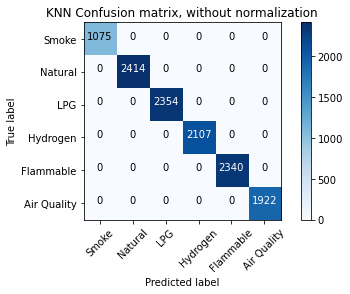

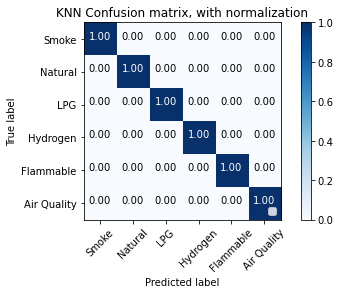

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['Smoke','Natural', 'LPG','Hydrogen','Flammable','Air Quality' ]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='KNN Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='KNN Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')

plt.show()


In [28]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log=clf.fit(X_train,y_train)
y_pred =log.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(log,X_test,y_test).mean())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ground truth           : 36798    6
30763    5
39931    6
16771    3
40375    6
        ..
2837     1
17676    3
10961    2
24425    4
16411    3
Name: Label, Length: 12212, dtype: int64
predicted class        : [6 5 6 ... 2 4 3]
ground truth           : 36798    6
30763    5
39931    6
16771    3
40375    6
        ..
2837     1
17676    3
10961    2
24425    4
16411    3
Name: Label, Length: 12212, dtype: int64
predicted class        : [6 5 6 ... 2 4 3]
cross validation acc   : 0.9792006310630953
Accuracy: 0.9790370127743203


Confusion matrix, without normalization
[[1075    0    0    0    0    0]
 [   0 2292  122    0    0    0]
 [   0  134 2220    0    0    0]
 [   0    0    0 2107    0    0]
 [   0    0    0    0 2340    0]
 [   0    0    0    0    0 1922]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.95 0.05 0.   0.   0.  ]
 [0.   0.06 0.94 0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]]


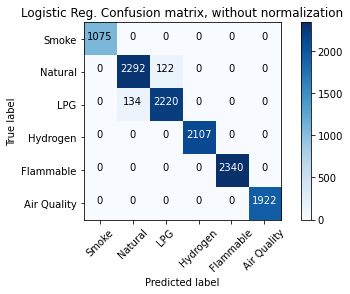

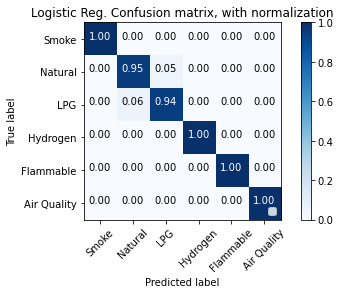

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['Smoke','Natural', 'LPG','Hydrogen','Flammable','Air Quality' ]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Reg. Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Logistic Reg. Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [30]:
clf = svm.LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
svm=clf.fit(X_train,y_train)

y_pred =svm.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(svm,X_test,y_test).mean())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ground truth           : 36798    6
30763    5
39931    6
16771    3
40375    6
        ..
2837     1
17676    3
10961    2
24425    4
16411    3
Name: Label, Length: 12212, dtype: int64
predicted class        : [6 5 6 ... 2 4 3]
cross validation acc   : 0.9769078310625587
Accuracy: 0.9774811660661644


Confusion matrix, without normalization
[[1075    0    0    0    0    0]
 [   0 2281  133    0    0    0]
 [   0  142 2212    0    0    0]
 [   0    0    0 2107    0    0]
 [   0    0    0    0 2340    0]
 [   0    0    0    0    0 1922]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.94 0.06 0.   0.   0.  ]
 [0.   0.06 0.94 0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]]


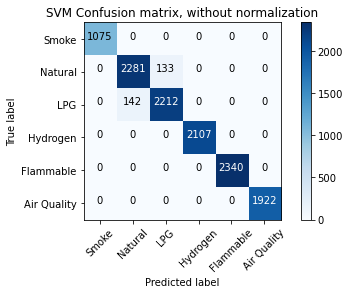

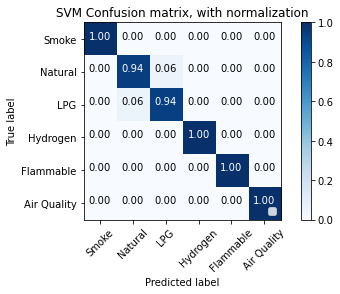

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['Smoke','Natural', 'LPG','Hydrogen','Flammable','Air Quality' ]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='SVM Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='SVM Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [7]:
#Random Forest grid search
clf=RandomForestClassifier(random_state=42) 

param_grid = { 
    'n_estimators': [50, 100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [10]:
clf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, 
                           criterion='entropy')
random=clf.fit(X_train,y_train)

y_pred =random.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(random,X_test,y_test).mean())

ground truth           : 36798    6
30763    5
39931    6
16771    3
40375    6
        ..
2837     1
17676    3
10961    2
24425    4
16411    3
Name: Label, Length: 12212, dtype: int64
predicted class        : [6 5 6 ... 2 4 3]
ground truth           : 36798    6
30763    5
39931    6
16771    3
40375    6
        ..
2837     1
17676    3
10961    2
24425    4
16411    3
Name: Label, Length: 12212, dtype: int64
predicted class        : [6 5 6 ... 2 4 3]
cross validation acc   : 0.9990172995903654


Confusion matrix, without normalization
[[1075    0    0    0    0    0]
 [   0 2406    8    0    0    0]
 [   0    2 2352    0    0    0]
 [   0    0    0 2107    0    0]
 [   0    0    0    0 2340    0]
 [   0    0    0    0    0 1922]]
Normalized confusion matrix
[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 9.97e-01 3.31e-03 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 8.50e-04 9.99e-01 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00]]


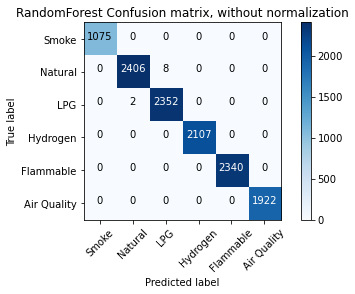

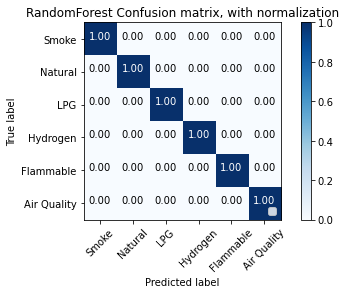

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['Smoke','Natural', 'LPG','Hydrogen','Flammable','Air Quality' ]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='RandomForest Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='RandomForest Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()